In [17]:
import numpy as np
import matplotlib.pyplot as plt
from pygam import LinearGAM, s, f

In [18]:
# Generate synthetic data
# Generate a dataset with two features and a target variable
n = 200
x1 = np.random.uniform(-3, 3, n)
x2 = np.random.uniform(-3, 3, n)
X = np.column_stack((x1, x2))
print(len(X))
# Genearate a target variable that is a linear combination of the functions of the features
y = np.sin(x1) + 0.5 * np.cos(x2) + np.random.normal(0, 0.2, n)

200


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     21.2117
Link Function:                     IdentityLink Log Likelihood:                                 -1998.6227
Number of Samples:                          200 AIC:                                             4041.6688
                                                AICc:                                            4047.5014
                                                GCV:                                                0.0445
                                                Scale:                                              0.0361
                                                Pseudo R-Squared:                                   0.9506
Feature Function                  Lam

/var/folders/sx/1v4_rhcd3h998mhd7mxbvfl00000gn/T/ipykernel_34766/64959711.py:4: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


Text(0.5, 1.0, 'Scatter plot of Feature 2 vs Target')

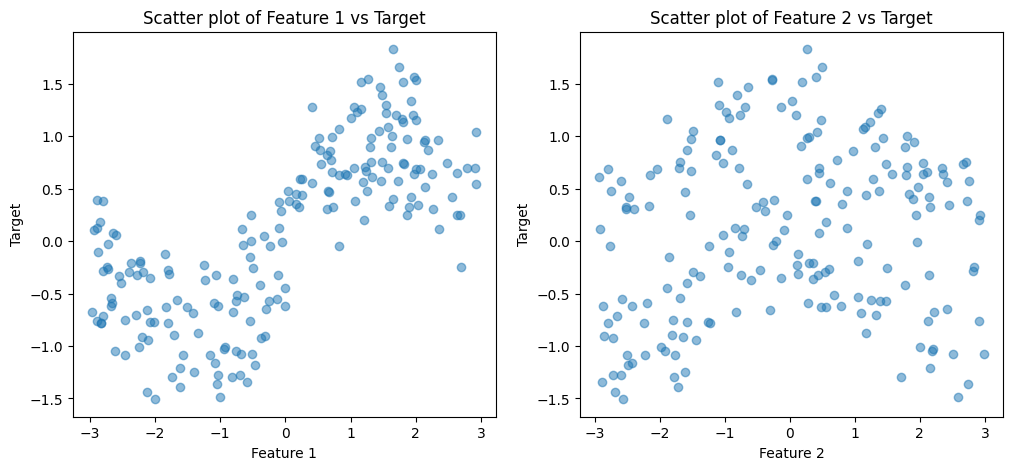

In [19]:
# Fit GAM
gam = LinearGAM(s(0) + s(1))
gam.fit(X, y)
print(gam.summary())

# Plot the relationship between the features and the target variable
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(x1, y, alpha=0.5)
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Target')
axs[0].set_title('Scatter plot of Feature 1 vs Target')

axs[1].scatter(x2, y, alpha=0.5)
axs[1].set_xlabel('Feature 2')
axs[1].set_ylabel('Target')
axs[1].set_title('Scatter plot of Feature 2 vs Target')



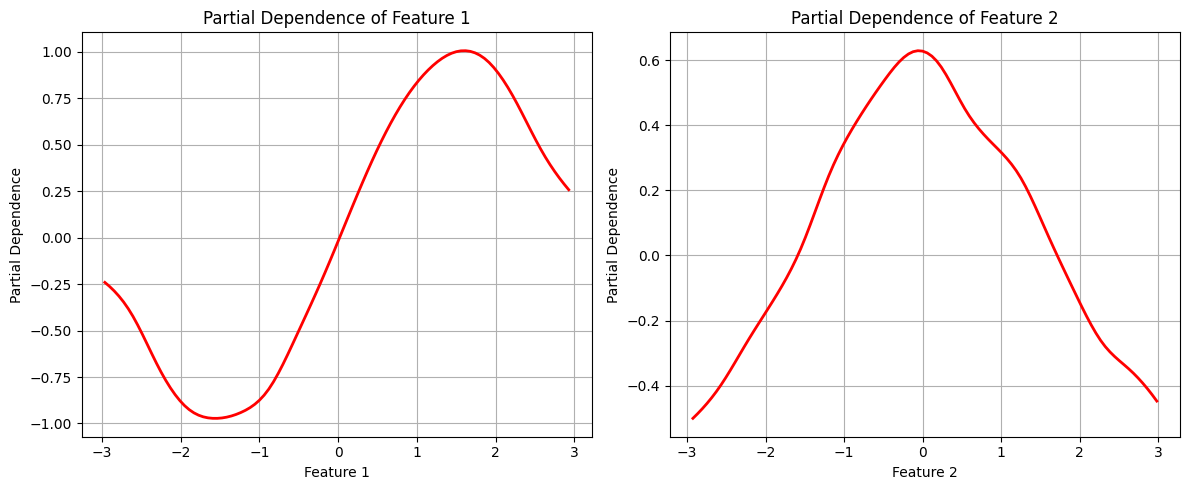

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX), color='red', linewidth=2)
    ax.set_xlabel(f'Feature {i+1}')
    ax.set_ylabel('Partial Dependence')
    ax.set_title(f'Partial Dependence of Feature {i+1}')
    ax.grid(True)

plt.tight_layout()
plt.show()